# Classification Methods

Implementation of various classification algorithms including Logistic Regression, Linear Discriminant Analysis (LDA), Quadratic Discriminant Analysis (QDA), and K-Nearest Neighbors (KNN).

## Contents
1. Data Loading and Exploration
2. Logistic Regression
3. Model Evaluation and Confusion Matrix
4. Cross-Validation
5. Linear Discriminant Analysis (LDA)
6. Quadratic Discriminant Analysis (QDA)
7. K-Nearest Neighbors (KNN)
8. Feature Scaling

## Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Load Smarket Dataset

Stock market data with daily percentage returns for the S&P 500 over a 5-year period (2001-2005).

In [2]:
# Load Smarket dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Smarket.csv"
Smarket = pd.read_csv(url)

print(f"Dataset shape: {Smarket.shape}")
print(f"\nColumn names:")
print(Smarket.columns.tolist())
Smarket.head()

Dataset shape: (1250, 9)

Column names:
['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today', 'Direction']


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [3]:
# Dataset summary
print("Summary Statistics:")
Smarket.describe()

Summary Statistics:


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [4]:
# Check data types and missing values
print("Data Info:")
print(Smarket.info())
print(f"\nTarget variable distribution:")
print(Smarket['Direction'].value_counts())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB
None

Target variable distribution:
Direction
Up      648
Down    602
Name: count, dtype: int64


### Exploratory Data Analysis

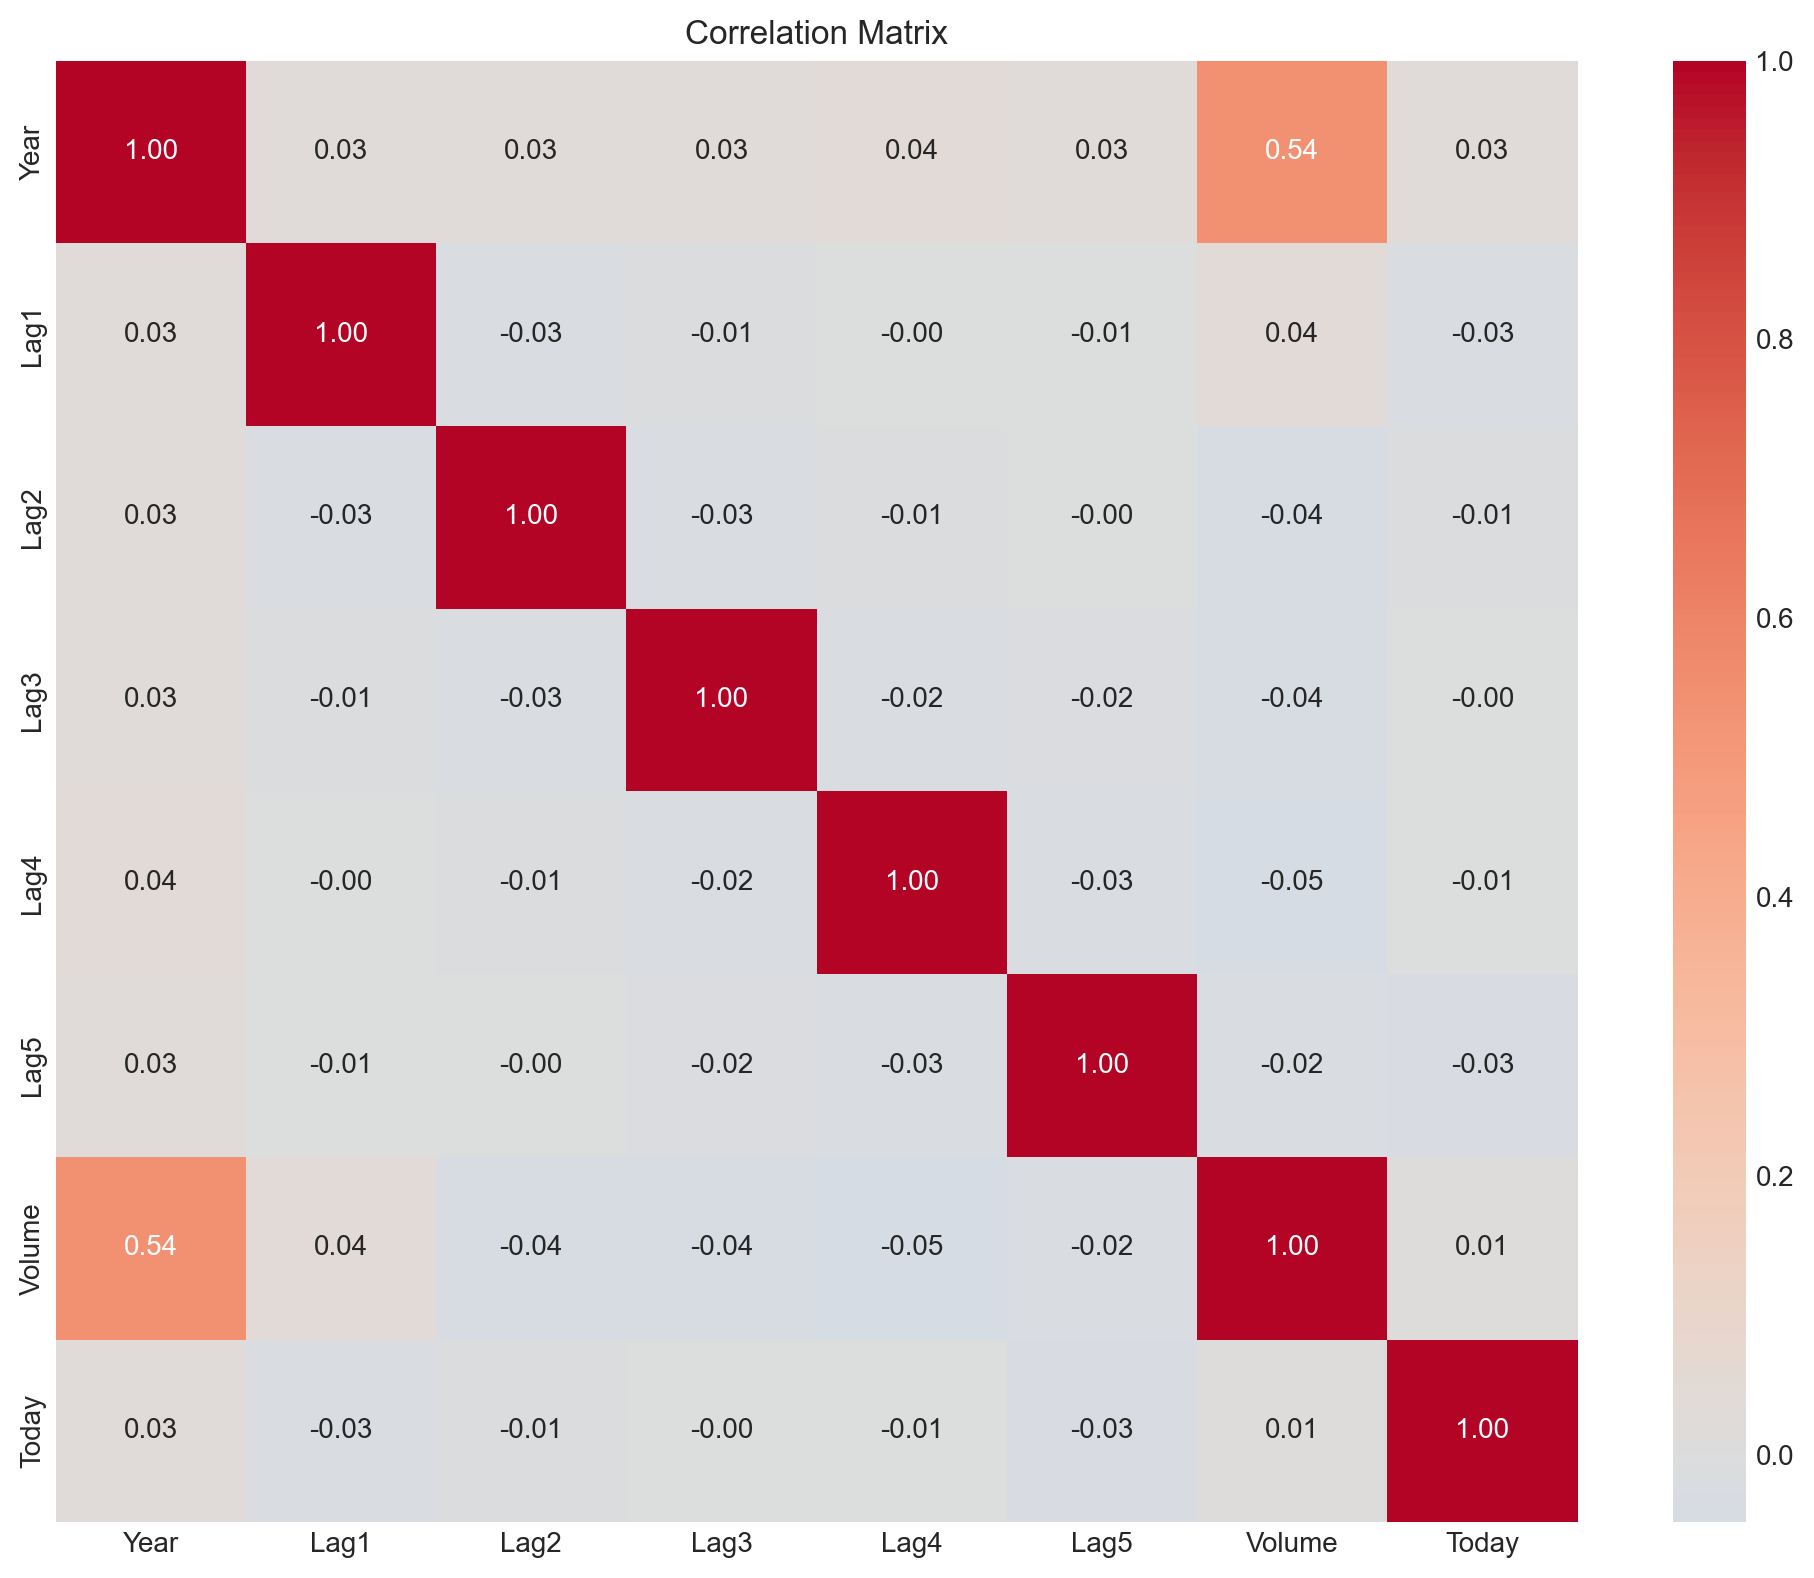


Key observation: Low correlation between Today and Lag1-5
This suggests past returns have little predictive power for future returns


In [5]:
# Correlation matrix (exclude Direction which is categorical)
numeric_cols = Smarket.select_dtypes(include=[np.number]).columns
correlation = Smarket[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("\nKey observation: Low correlation between Today and Lag1-5")
print("This suggests past returns have little predictive power for future returns")

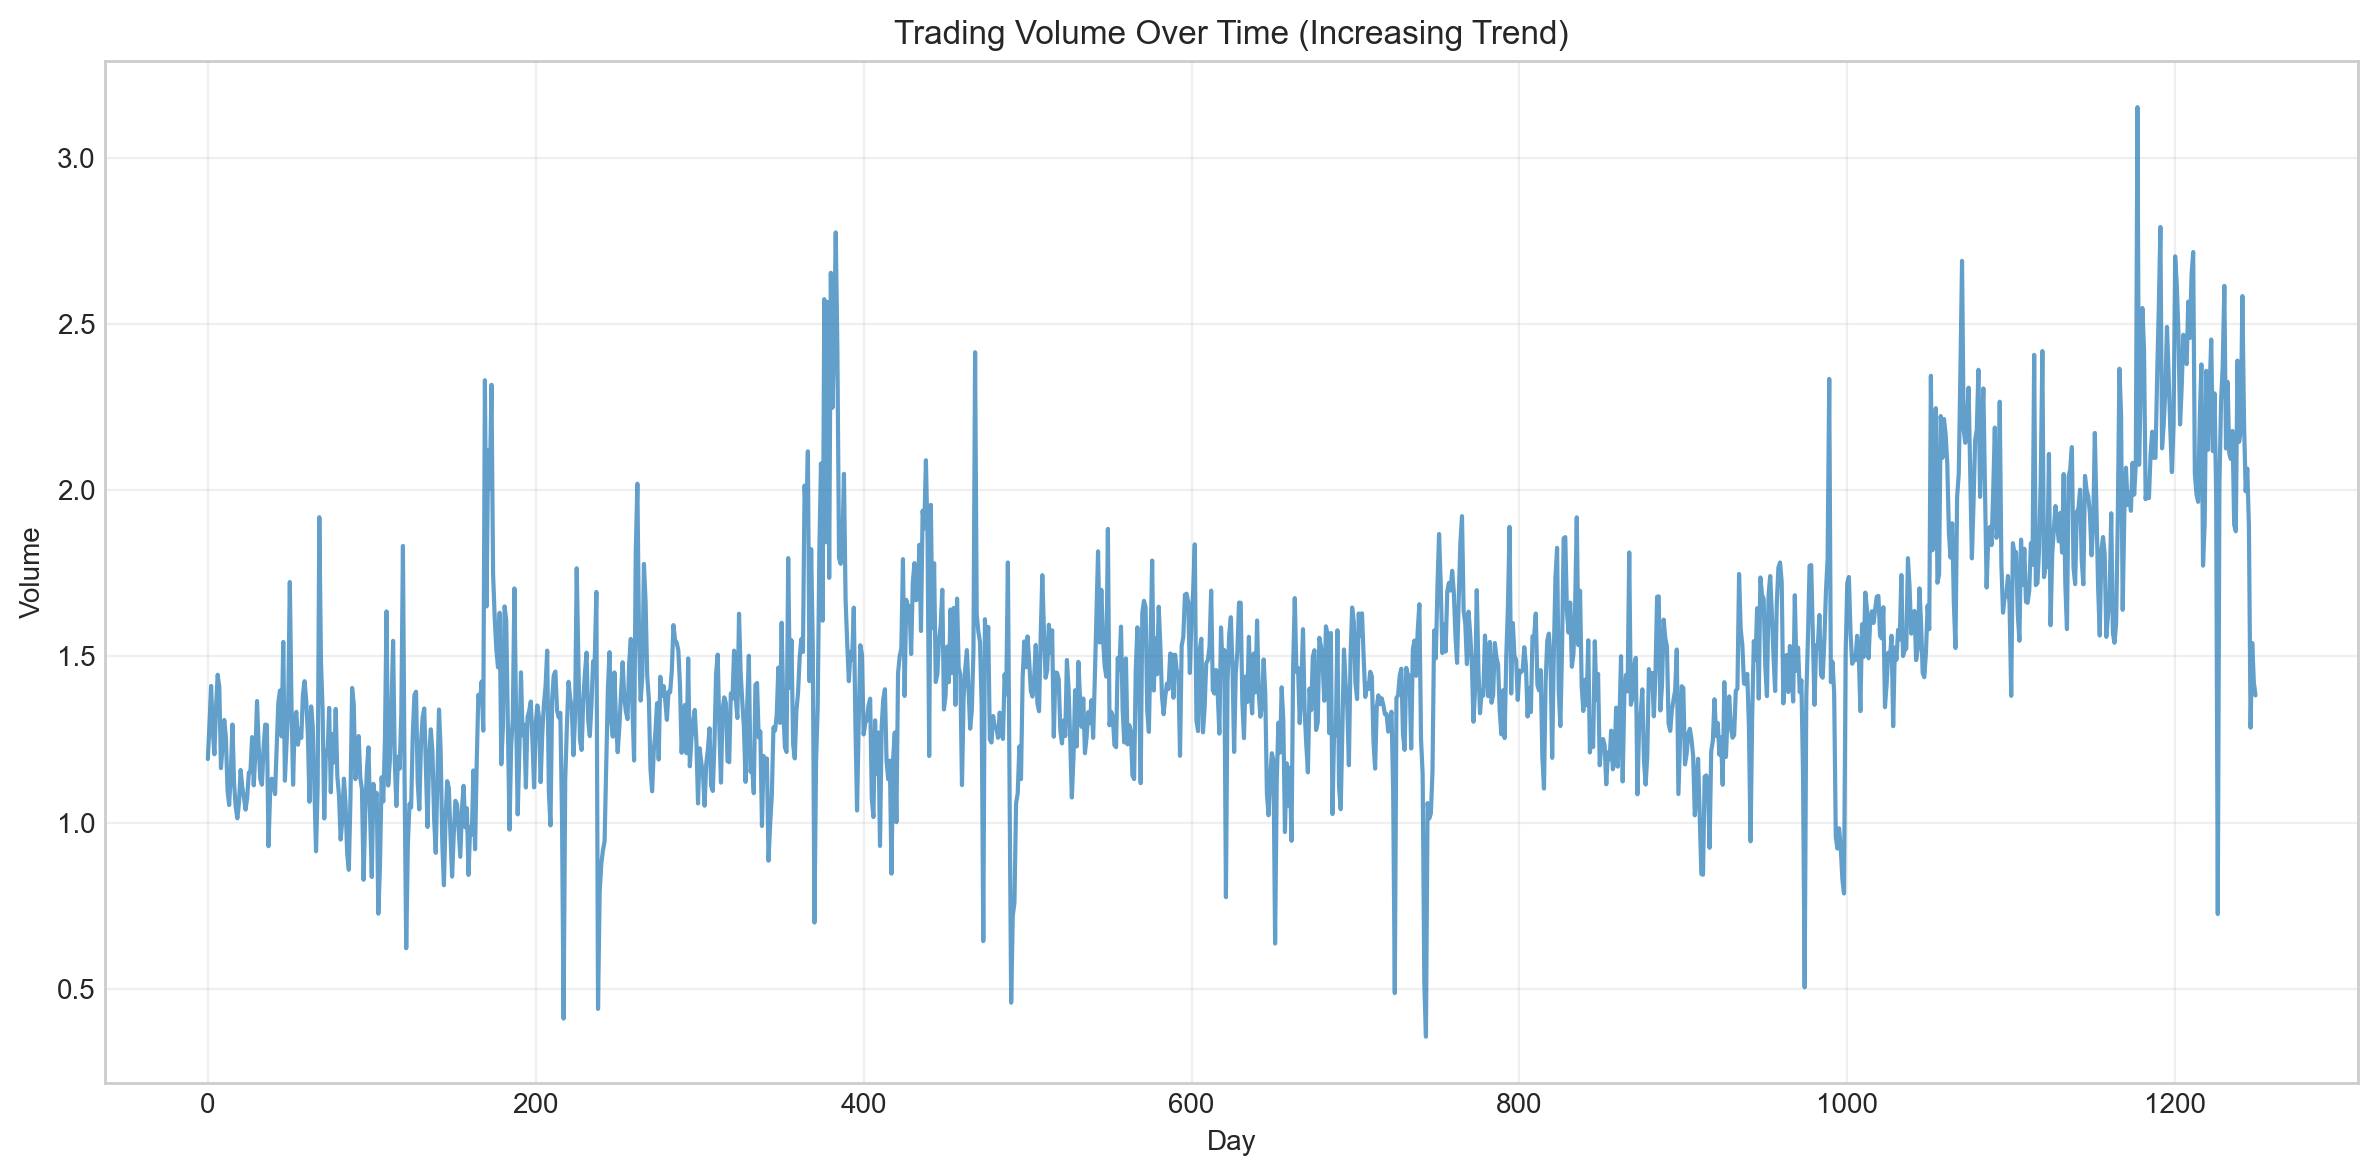

In [6]:
# Volume trend over time
plt.figure(figsize=(12, 6))
plt.plot(Smarket['Volume'], alpha=0.7)
plt.xlabel('Day')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time (Increasing Trend)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Logistic Regression

Binary classification: Predict market direction (Up/Down) based on previous days' returns.

In [7]:
# Prepare features and target
X = Smarket[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = (Smarket['Direction'] == 'Up').astype(int)  # Up=1, Down=0

# Fit logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X, y)

print("Logistic Regression Coefficients:")
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values('Coefficient', ascending=False)
print(coef_df)
print(f"\nIntercept: {log_reg.intercept_[0]:.4f}")

Logistic Regression Coefficients:
  Feature  Coefficient
5  Volume     0.132729
2    Lag3     0.010945
4    Lag5     0.010226
3    Lag4     0.009225
1    Lag2    -0.042422
0    Lag1    -0.073094

Intercept: -0.1222


In [8]:
# Predictions and probabilities
y_pred = log_reg.predict(X)
y_probs = log_reg.predict_proba(X)[:, 1]  # Probability of Up

print("First 10 predictions:")
results_df = pd.DataFrame({
    'Actual': y[:10].values,
    'Predicted': y_pred[:10],
    'Prob(Up)': y_probs[:10]
})
print(results_df)

First 10 predictions:
   Actual  Predicted  Prob(Up)
0       1          1  0.507257
1       1          0  0.481649
2       0          0  0.481157
3       1          1  0.515246
4       1          1  0.510862
5       1          1  0.506948
6       0          0  0.492593
7       1          1  0.509180
8       1          1  0.517726
9       1          0  0.488917


## Confusion Matrix and Accuracy

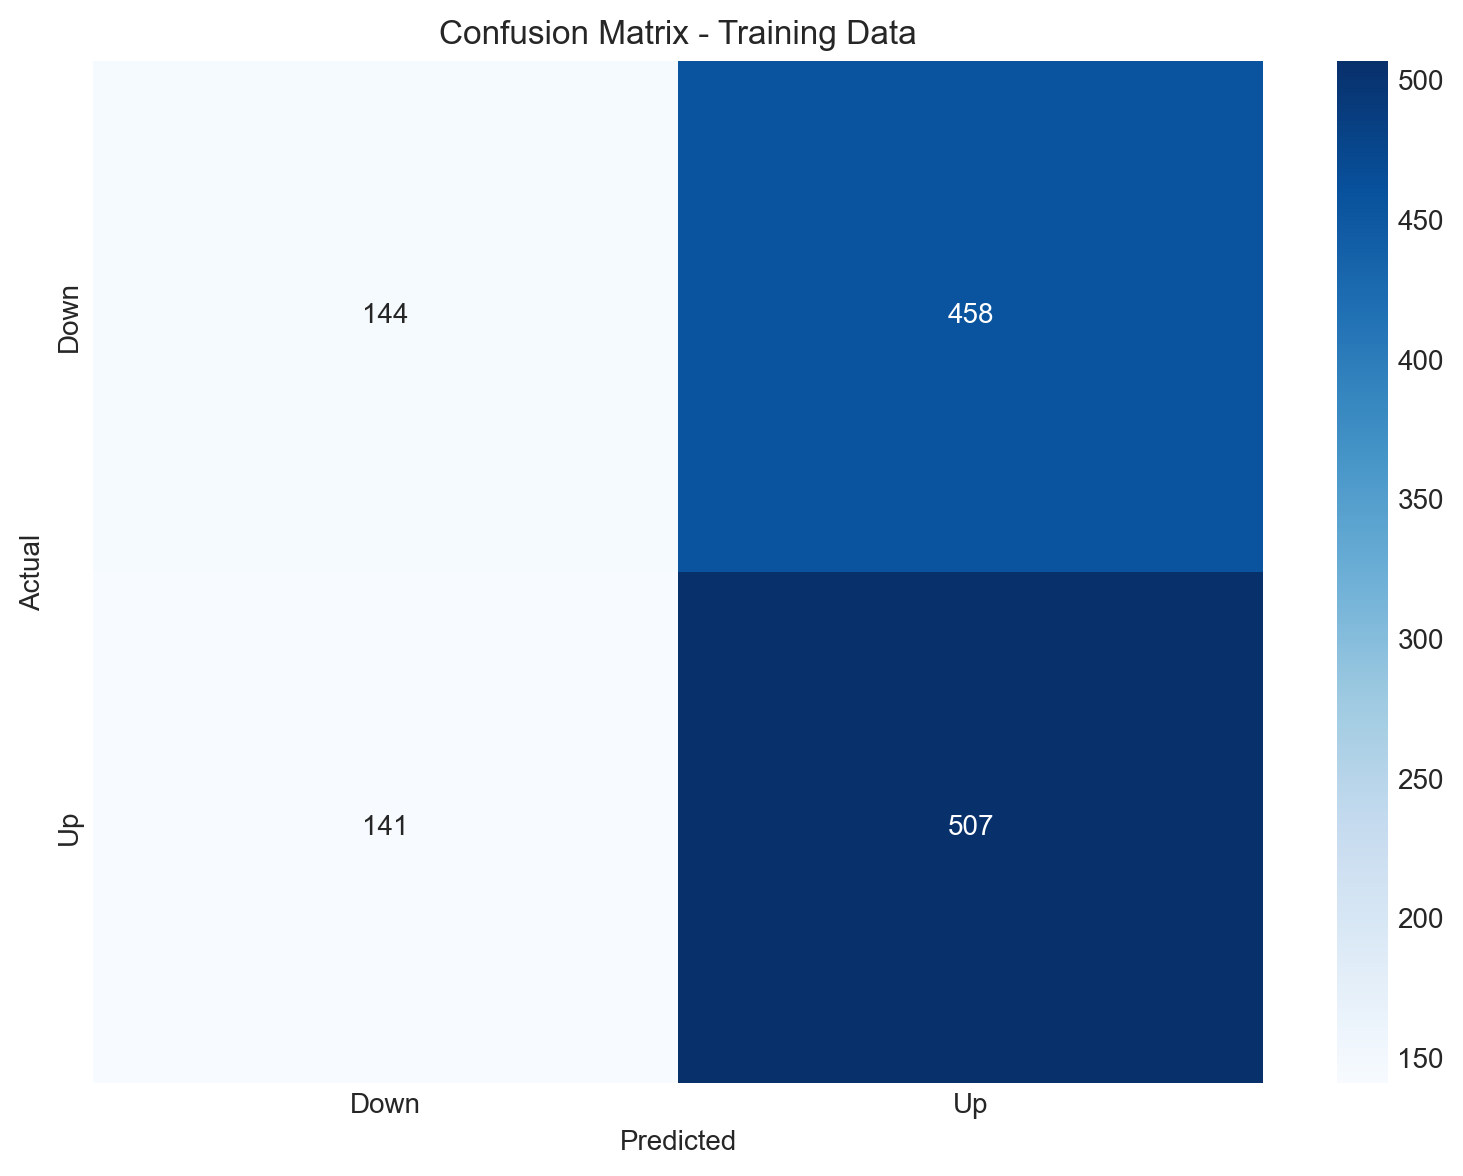


Training Accuracy: 0.5208
Training Error Rate: 0.4792

Classification Report:
              precision    recall  f1-score   support

        Down       0.51      0.24      0.32       602
          Up       0.53      0.78      0.63       648

    accuracy                           0.52      1250
   macro avg       0.52      0.51      0.48      1250
weighted avg       0.52      0.52      0.48      1250



In [9]:
# Confusion matrix
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Data')
plt.tight_layout()
plt.show()

# Calculate metrics
accuracy = accuracy_score(y, y_pred)
print(f"\nTraining Accuracy: {accuracy:.4f}")
print(f"Training Error Rate: {1 - accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=['Down', 'Up']))

## Cross-Validation: Train/Test Split

Train on years 2001-2004, test on year 2005.

In [10]:
# Create train/test split based on year
train_mask = Smarket['Year'] < 2005
test_mask = Smarket['Year'] >= 2005

X_train = X[train_mask]
X_test = X[test_mask]
y_train = y[train_mask]
y_test = y[test_mask]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"\nTest set year distribution:")
print(Smarket[test_mask]['Year'].value_counts().sort_index())

Training set size: 998
Test set size: 252

Test set year distribution:
Year
2005    252
Name: count, dtype: int64


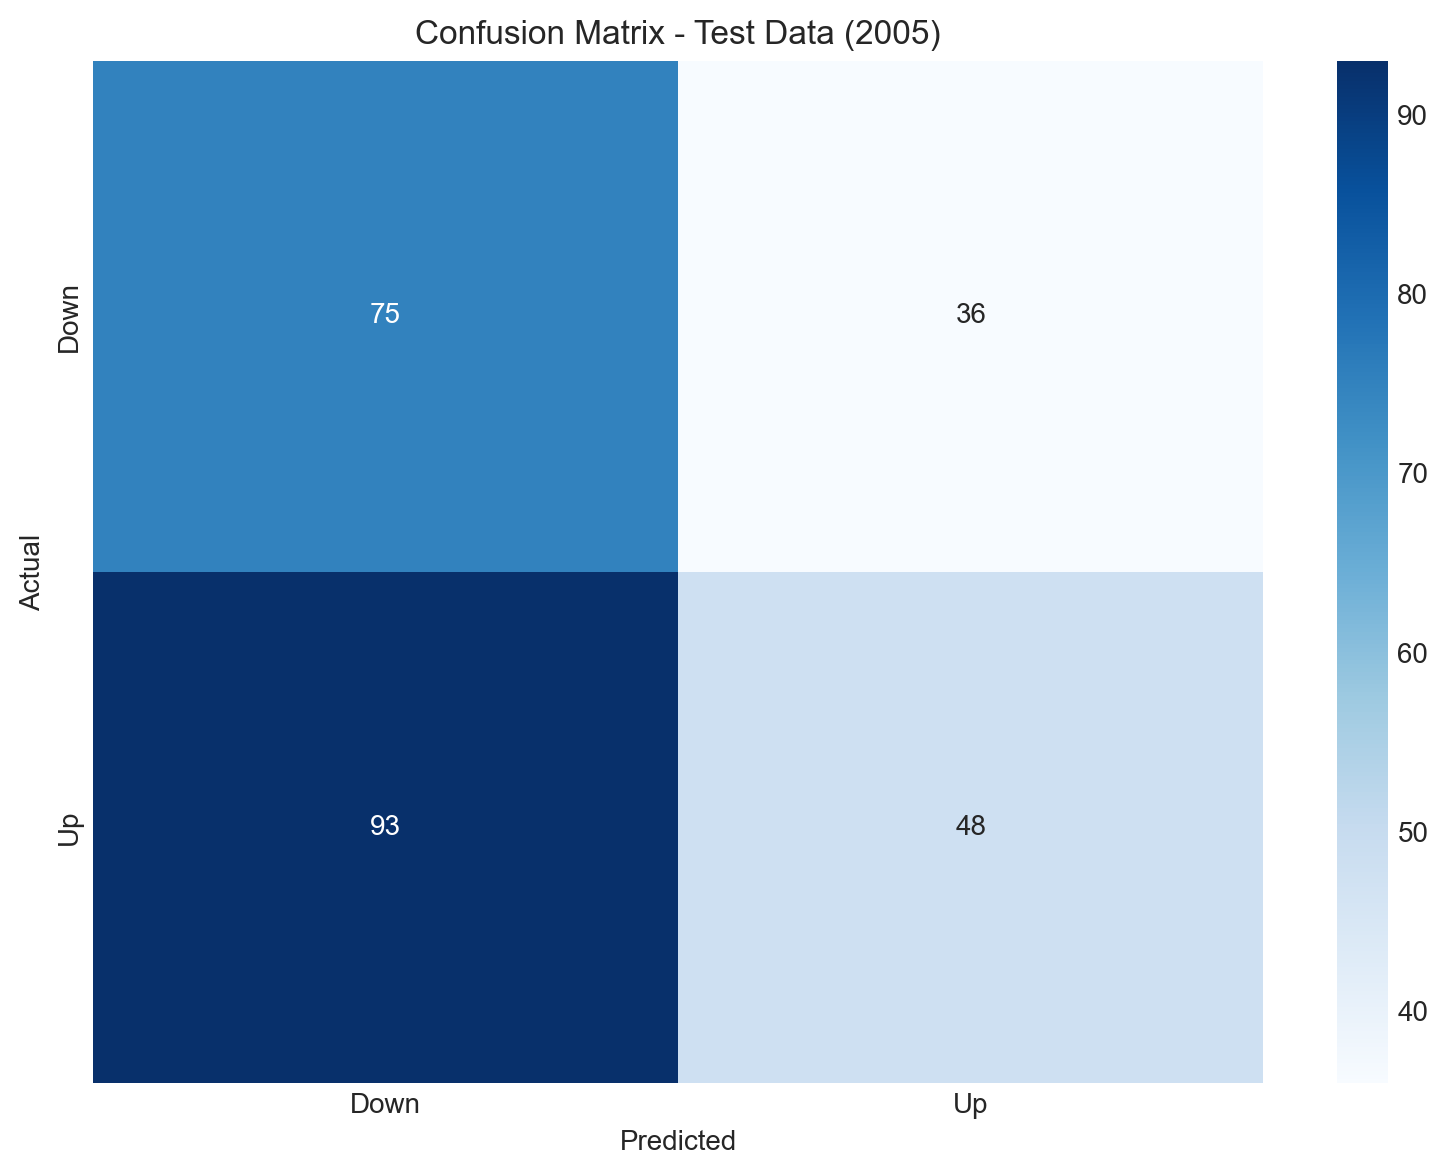


Test Accuracy: 0.4881
Test Error Rate: 0.5119


In [11]:
# Train on training data
log_reg_cv = LogisticRegression(max_iter=1000, random_state=42)
log_reg_cv.fit(X_train, y_train)

# Predict on test data
y_pred_test = log_reg_cv.predict(X_test)
y_probs_test = log_reg_cv.predict_proba(X_test)[:, 1]

# Confusion matrix for test data
cm_test = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Data (2005)')
plt.tight_layout()
plt.show()

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Error Rate: {1 - test_accuracy:.4f}")

## Feature Selection: Using Only Lag1 and Lag2

Remove predictors with high p-values to reduce variance.

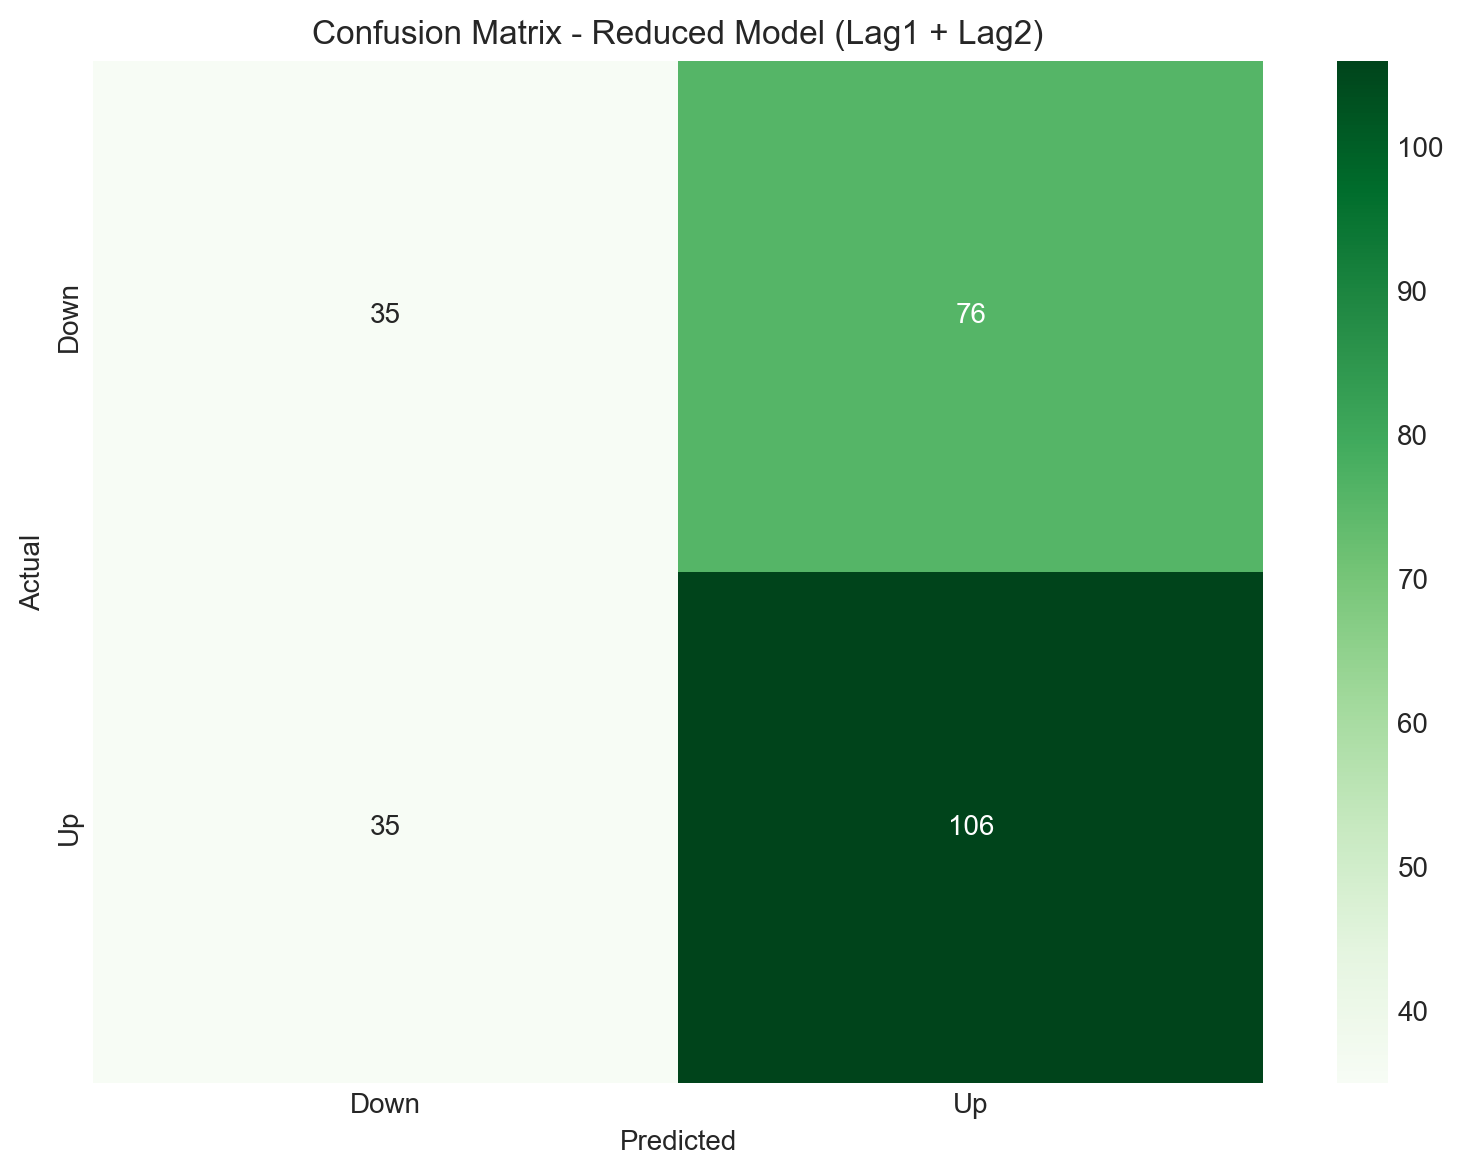


Test Accuracy (Reduced Model): 0.5595
Improvement: 0.0714


In [12]:
# Use only Lag1 and Lag2 (lowest p-values from full model)
X_reduced = Smarket[['Lag1', 'Lag2']]
X_train_red = X_reduced[train_mask]
X_test_red = X_reduced[test_mask]

# Fit model
log_reg_red = LogisticRegression(max_iter=1000, random_state=42)
log_reg_red.fit(X_train_red, y_train)

# Predict
y_pred_red = log_reg_red.predict(X_test_red)

# Confusion matrix
cm_red = confusion_matrix(y_test, y_pred_red)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_red, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Reduced Model (Lag1 + Lag2)')
plt.tight_layout()
plt.show()

test_accuracy_red = accuracy_score(y_test, y_pred_red)
print(f"\nTest Accuracy (Reduced Model): {test_accuracy_red:.4f}")
print(f"Improvement: {test_accuracy_red - test_accuracy:.4f}")

In [13]:
# Predict for new data
new_data = pd.DataFrame({
    'Lag1': [1.2, 1.5],
    'Lag2': [1.1, -0.8]
})

predictions = log_reg_red.predict(new_data)
probabilities = log_reg_red.predict_proba(new_data)[:, 1]

print("Predictions for new data:")
results = pd.DataFrame({
    'Lag1': new_data['Lag1'],
    'Lag2': new_data['Lag2'],
    'Prediction': ['Up' if p == 1 else 'Down' for p in predictions],
    'Prob(Up)': probabilities
})
print(results)

Predictions for new data:
   Lag1  Lag2 Prediction  Prob(Up)
0   1.2   1.1       Down  0.479228
1   1.5  -0.8       Down  0.496093


## Linear Discriminant Analysis (LDA)

Alternative to logistic regression for binary and multi-class classification.

In [14]:
# Fit LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_red, y_train)

# Predictions
y_pred_lda = lda.predict(X_test_red)
y_probs_lda = lda.predict_proba(X_test_red)

print("LDA Model Parameters:")
print(f"Priors: {lda.priors_}")
print(f"\nClass means:")
print(pd.DataFrame(lda.means_, columns=['Lag1', 'Lag2'], index=['Down', 'Up']))

LDA Model Parameters:
Priors: [0.49198397 0.50801603]

Class means:
          Lag1      Lag2
Down  0.042790  0.033894
Up   -0.039546 -0.031325


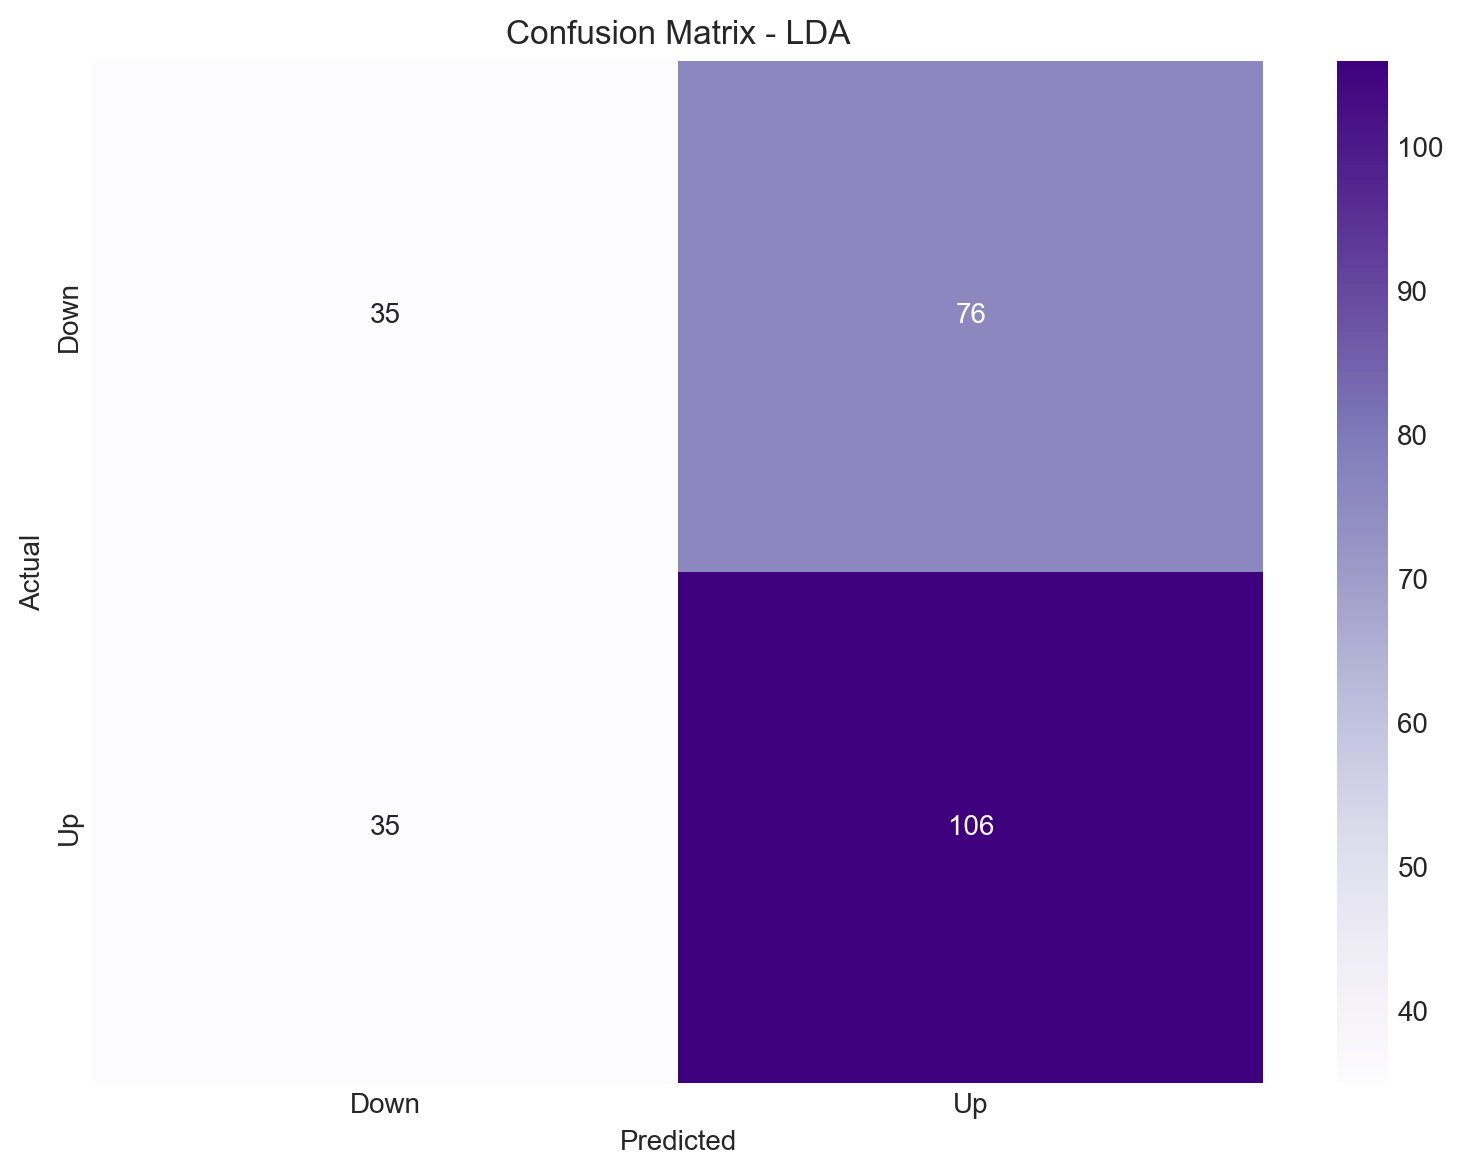


LDA Test Accuracy: 0.5595


In [15]:
# Confusion matrix for LDA
cm_lda = confusion_matrix(y_test, y_pred_lda)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LDA')
plt.tight_layout()
plt.show()

lda_accuracy = accuracy_score(y_test, y_pred_lda)
print(f"\nLDA Test Accuracy: {lda_accuracy:.4f}")

In [16]:
# Posterior probabilities
print("First 20 posterior probabilities (Down class):")
print(y_probs_lda[:20, 0])
print("\nFirst 20 predictions:")
print(['Up' if p == 1 else 'Down' for p in y_pred_lda[:20]])

First 20 posterior probabilities (Down class):
[0.49017925 0.4792185  0.46681848 0.47400107 0.49278766 0.49385615
 0.49510156 0.4872861  0.49070135 0.48440262 0.49069628 0.51199885
 0.48951523 0.47067612 0.47445929 0.47995834 0.49357753 0.50308938
 0.49788061 0.48863309]

First 20 predictions:
['Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up']


## Quadratic Discriminant Analysis (QDA)

Allows for non-linear decision boundaries between classes.

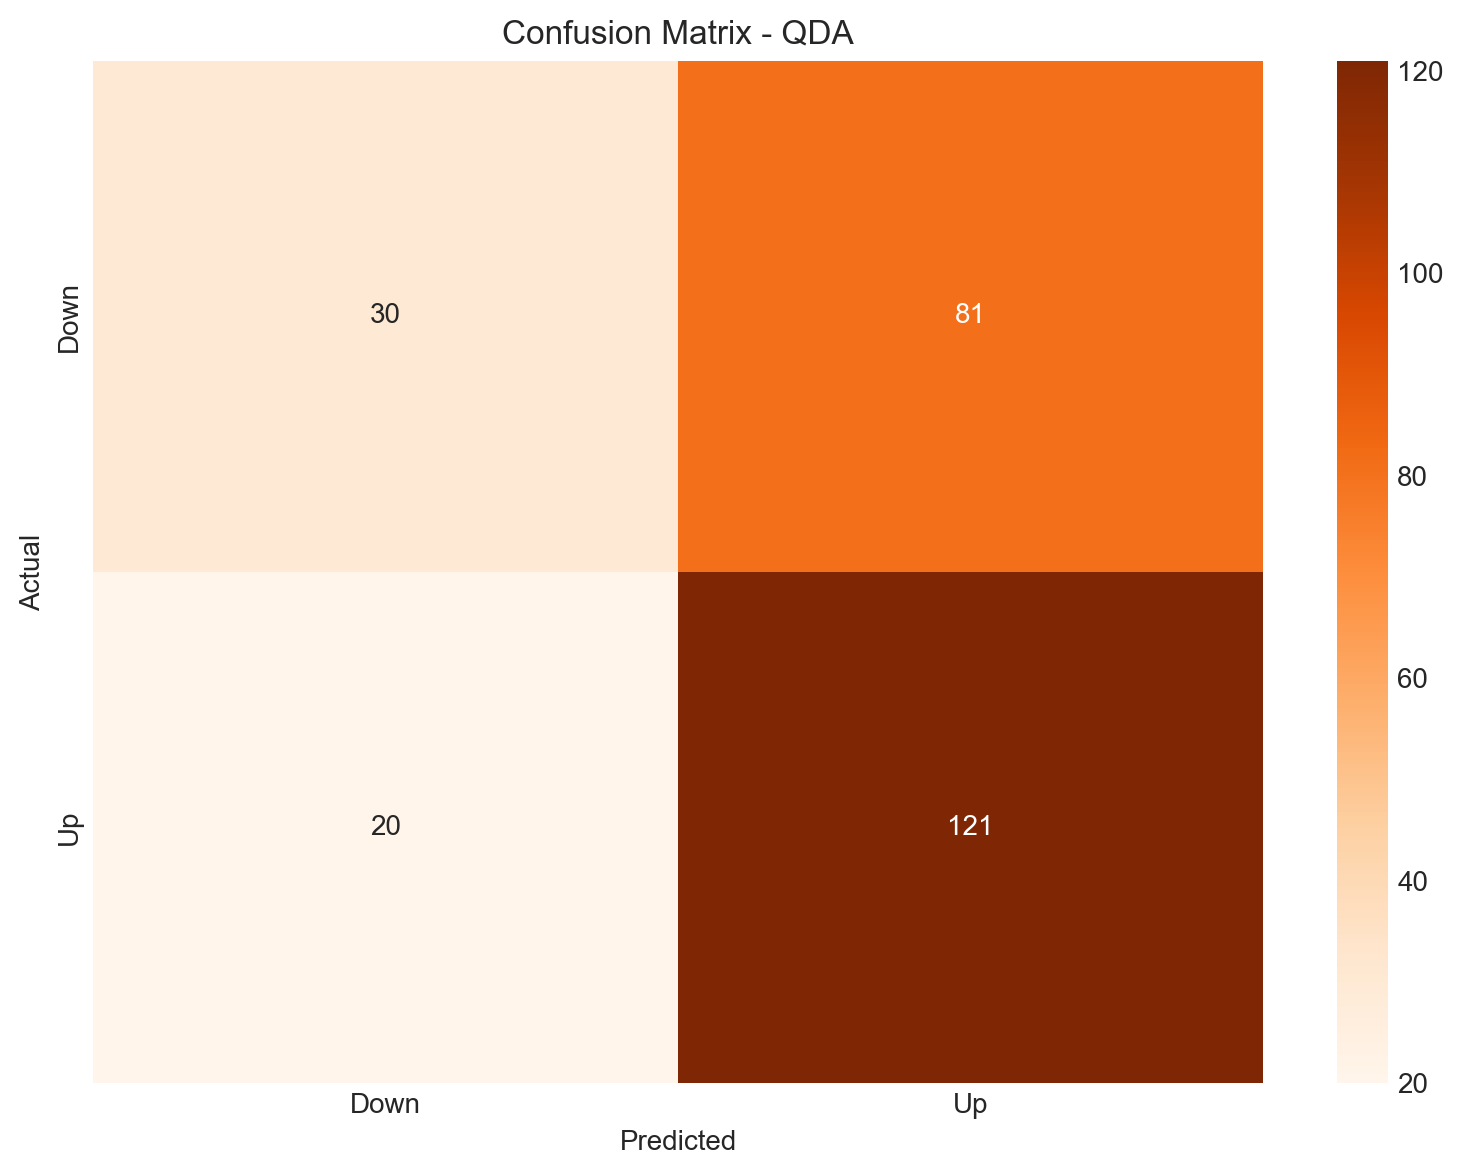


QDA Test Accuracy: 0.5992
Improvement over LDA: 0.0397


In [17]:
# Fit QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_red, y_train)

# Predictions
y_pred_qda = qda.predict(X_test_red)

# Confusion matrix
cm_qda = confusion_matrix(y_test, y_pred_qda)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_qda, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - QDA')
plt.tight_layout()
plt.show()

qda_accuracy = accuracy_score(y_test, y_pred_qda)
print(f"\nQDA Test Accuracy: {qda_accuracy:.4f}")
print(f"Improvement over LDA: {qda_accuracy - lda_accuracy:.4f}")

## K-Nearest Neighbors (KNN)

In [18]:
# KNN with K=1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_red, y_train)
y_pred_knn1 = knn1.predict(X_test_red)

cm_knn1 = confusion_matrix(y_test, y_pred_knn1)
knn1_accuracy = accuracy_score(y_test, y_pred_knn1)

print(f"KNN (K=1) Test Accuracy: {knn1_accuracy:.4f}")
print("\nConfusion Matrix:")
print(cm_knn1)

KNN (K=1) Test Accuracy: 0.5000

Confusion Matrix:
[[43 68]
 [58 83]]


In [19]:
# KNN with K=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_red, y_train)
y_pred_knn3 = knn3.predict(X_test_red)

cm_knn3 = confusion_matrix(y_test, y_pred_knn3)
knn3_accuracy = accuracy_score(y_test, y_pred_knn3)

print(f"KNN (K=3) Test Accuracy: {knn3_accuracy:.4f}")
print("\nConfusion Matrix:")
print(cm_knn3)

KNN (K=3) Test Accuracy: 0.5317

Confusion Matrix:
[[48 63]
 [55 86]]


## Model Comparison

In [20]:
# Compare all models
results_comparison = pd.DataFrame({
    'Model': ['Logistic Regression (All)', 'Logistic Regression (Lag1+Lag2)', 
              'LDA', 'QDA', 'KNN (K=1)', 'KNN (K=3)'],
    'Test Accuracy': [
        test_accuracy,
        test_accuracy_red,
        lda_accuracy,
        qda_accuracy,
        knn1_accuracy,
        knn3_accuracy
    ]
}).sort_values('Test Accuracy', ascending=False)

print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(results_comparison.to_string(index=False))
print("="*50)


MODEL COMPARISON
                          Model  Test Accuracy
                            QDA       0.599206
Logistic Regression (Lag1+Lag2)       0.559524
                            LDA       0.559524
                      KNN (K=3)       0.531746
                      KNN (K=1)       0.500000
      Logistic Regression (All)       0.488095


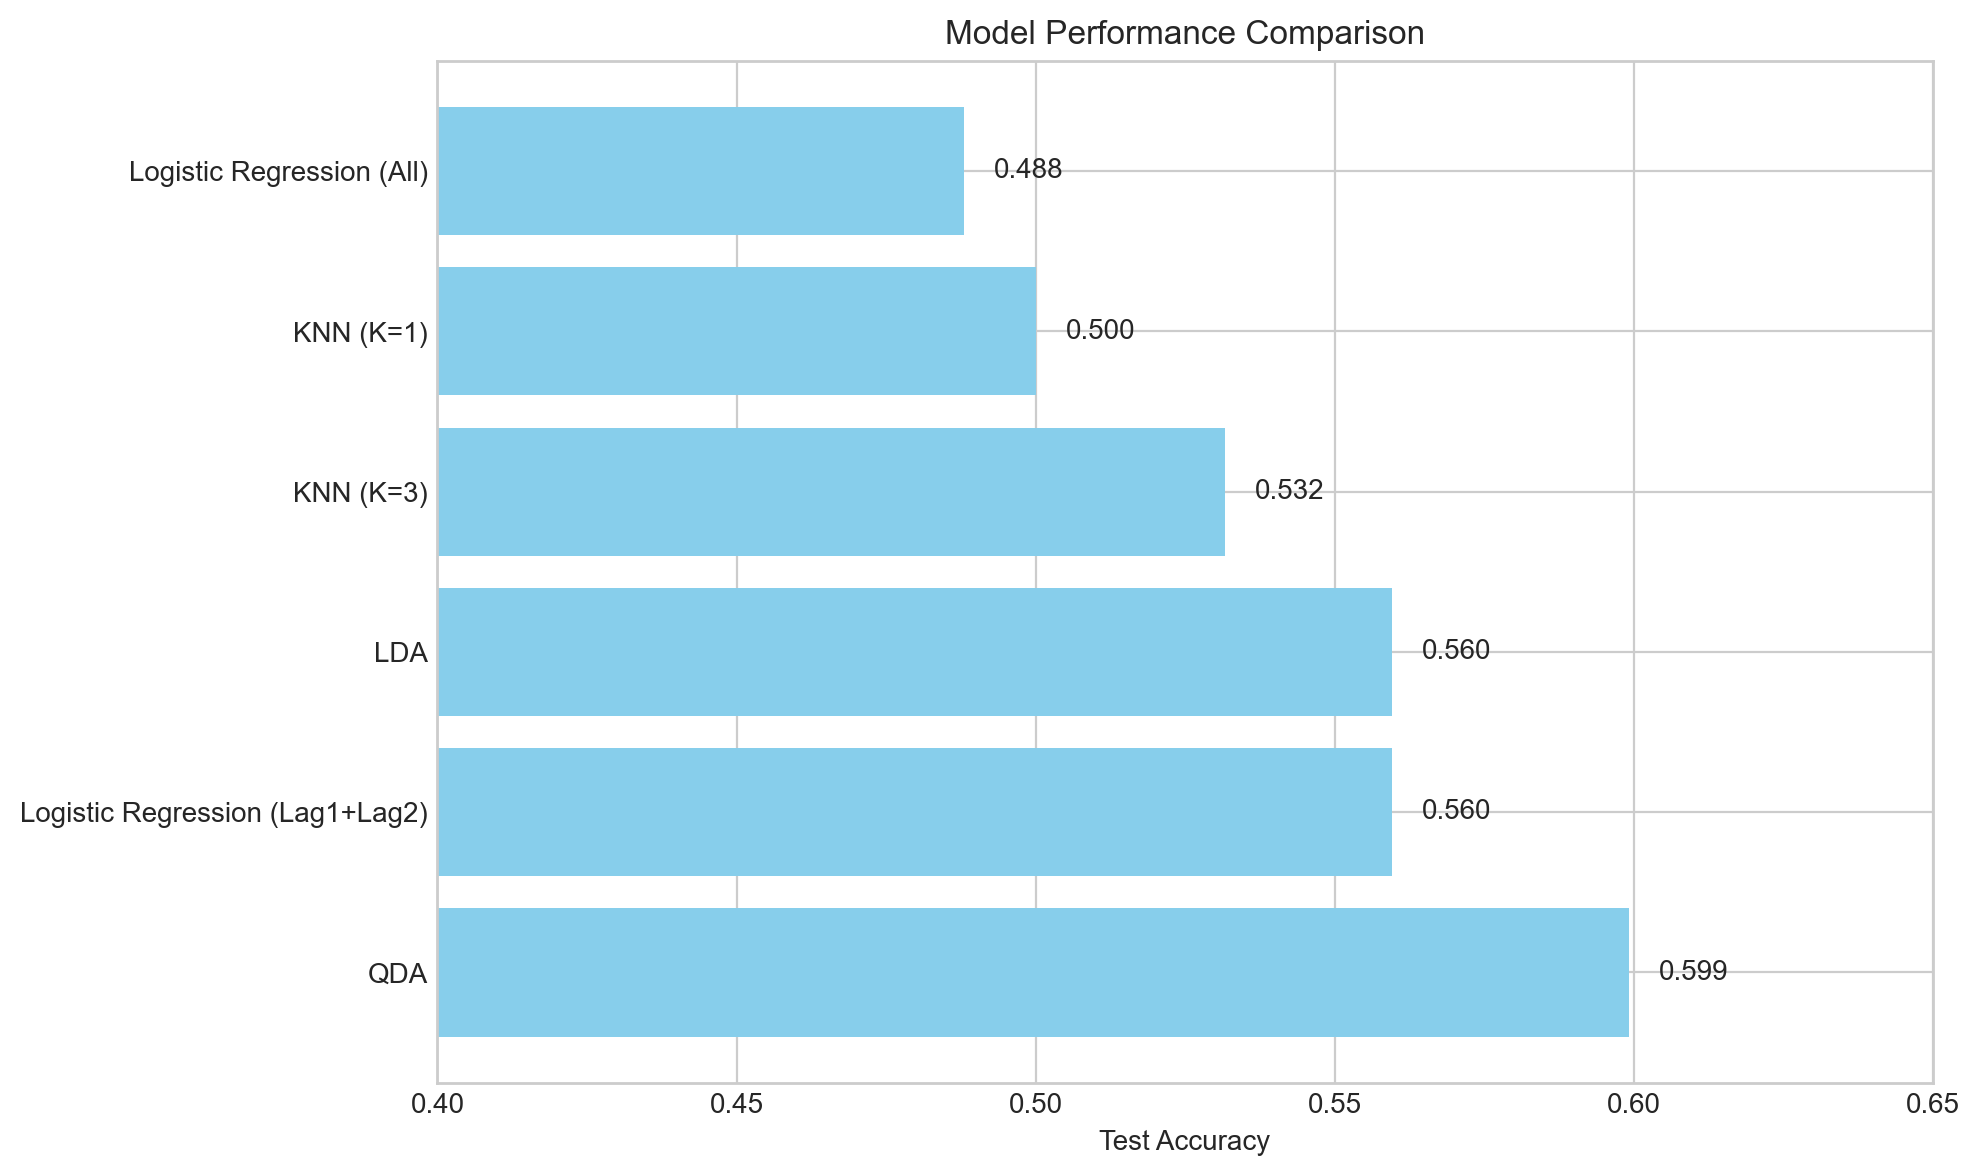

In [21]:
# Visualize model comparison
plt.figure(figsize=(10, 6))
plt.barh(results_comparison['Model'], results_comparison['Test Accuracy'], color='skyblue')
plt.xlabel('Test Accuracy')
plt.title('Model Performance Comparison')
plt.xlim([0.4, 0.65])
for i, v in enumerate(results_comparison['Test Accuracy']):
    plt.text(v + 0.005, i, f'{v:.3f}', va='center')
plt.tight_layout()
plt.show()

## Caravan Insurance Dataset

Predicting whether customers will purchase caravan insurance.

In [27]:
# Load Caravan dataset
try:
    url_caravan = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Caravan.csv"
    Caravan = pd.read_csv(url_caravan)
    print(f"Dataset shape: {Caravan.shape}")
    
    # Check target variable
    print(f"\nPurchase distribution:")
    print(Caravan['Purchase'].value_counts())
    print(f"\nPurchase rate: {Caravan['Purchase'].value_counts(normalize=True)['Yes']:.1%}")
    
except:
    print("Could not load Caravan dataset. Skipping this section.")

Dataset shape: (5822, 87)

Purchase distribution:
Purchase
No     5474
Yes     348
Name: count, dtype: int64

Purchase rate: 6.0%


### Feature Scaling

Standardize features to have mean=0 and variance=1. Critical for KNN!

In [28]:
if 'Caravan' in locals():
    # Separate features and target
    X_caravan = Caravan.drop('Purchase', axis=1)
    y_caravan = (Caravan['Purchase'] == 'Yes').astype(int)
    
    # Check variance before scaling
    print("Before scaling:")
    print(f"Variance of first feature: {X_caravan.iloc[:, 0].var():.4f}")
    print(f"Variance of second feature: {X_caravan.iloc[:, 1].var():.4f}")
    print(f"Mean of first feature: {X_caravan.iloc[:, 0].mean():.4f}")
    
    # Standardize
    scaler = StandardScaler()
    X_caravan_scaled = scaler.fit_transform(X_caravan)
    X_caravan_scaled = pd.DataFrame(X_caravan_scaled, columns=X_caravan.columns)
    
    print("\nAfter scaling:")
    print(f"Variance of first feature: {X_caravan_scaled.iloc[:, 0].var():.4f}")
    print(f"Variance of second feature: {X_caravan_scaled.iloc[:, 1].var():.4f}")
    print(f"Mean of first feature: {X_caravan_scaled.iloc[:, 0].mean():.10f}")

Before scaling:
Variance of first feature: 2825125.5000
Variance of second feature: 165.0378
Mean of first feature: 2911.5000

After scaling:
Variance of first feature: 1.0002
Variance of second feature: 1.0002
Mean of first feature: -0.0000000000


In [29]:
if 'Caravan' in locals():
    # Train/test split: first 1000 as test
    X_train_car = X_caravan_scaled.iloc[1000:]
    X_test_car = X_caravan_scaled.iloc[:1000]
    y_train_car = y_caravan.iloc[1000:]
    y_test_car = y_caravan.iloc[:1000]
    
    print(f"Training set size: {len(X_train_car)}")
    print(f"Test set size: {len(X_test_car)}")
    print(f"\nBaseline (predict No for all): {(y_test_car == 0).mean():.1%}")

Training set size: 4822
Test set size: 1000

Baseline (predict No for all): 94.1%


### KNN on Caravan Data

In [30]:
if 'Caravan' in locals():
    # KNN with different K values
    k_values = [1, 2, 3, 5]
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_car, y_train_car)
        y_pred = knn.predict(X_test_car)
        
        cm = confusion_matrix(y_test_car, y_pred)
        error_rate = 1 - accuracy_score(y_test_car, y_pred)
        
        # True Positive Rate (for those who buy)
        if cm[1, 1] + cm[1, 0] > 0:
            tpr = cm[1, 1] / (cm[1, 1] + cm[1, 0])
        else:
            tpr = 0
        
        print(f"\n{'='*50}")
        print(f"KNN with K={k}")
        print(f"{'='*50}")
        print(f"Error Rate: {error_rate:.4f}")
        print(f"True Positive Rate: {tpr:.1%}")
        print(f"\nConfusion Matrix:")
        print(cm)


KNN with K=1
Error Rate: 0.1070
True Positive Rate: 18.6%

Confusion Matrix:
[[882  59]
 [ 48  11]]

KNN with K=2
Error Rate: 0.0670
True Positive Rate: 3.4%

Confusion Matrix:
[[931  10]
 [ 57   2]]

KNN with K=3
Error Rate: 0.0730
True Positive Rate: 10.2%

Confusion Matrix:
[[921  20]
 [ 53   6]]

KNN with K=5
Error Rate: 0.0620
True Positive Rate: 6.8%

Confusion Matrix:
[[934   7]
 [ 55   4]]


### Logistic Regression on Caravan with Different Cutoffs

In [31]:
if 'Caravan' in locals():
    # Fit logistic regression
    log_reg_car = LogisticRegression(max_iter=1000, random_state=42)
    log_reg_car.fit(X_train_car, y_train_car)
    
    # Get probabilities
    y_probs_car = log_reg_car.predict_proba(X_test_car)[:, 1]
    
    # Test different cutoffs
    cutoffs = [0.5, 0.25]
    
    for cutoff in cutoffs:
        y_pred_car = (y_probs_car > cutoff).astype(int)
        cm = confusion_matrix(y_test_car, y_pred_car)
        
        # True Positive Rate
        if cm[1, 1] + cm[1, 0] > 0:
            tpr = cm[1, 1] / (cm[1, 1] + cm[1, 0])
        else:
            tpr = 0
        
        print(f"\n{'='*50}")
        print(f"Logistic Regression with cutoff = {cutoff}")
        print(f"{'='*50}")
        print(f"True Positive Rate: {tpr:.1%}")
        print(f"\nConfusion Matrix:")
        print(cm)
        print(f"\nInterpretation: {tpr:.1%} of actual buyers were correctly identified")


Logistic Regression with cutoff = 0.5
True Positive Rate: 0.0%

Confusion Matrix:
[[935   6]
 [ 59   0]]

Interpretation: 0.0% of actual buyers were correctly identified

Logistic Regression with cutoff = 0.25
True Positive Rate: 18.6%

Confusion Matrix:
[[919  22]
 [ 48  11]]

Interpretation: 18.6% of actual buyers were correctly identified


## Summary

This notebook covered:
- **Logistic Regression**: Binary classification with probability outputs
- **LDA**: Assumes Gaussian distributions with common covariance
- **QDA**: Allows different covariances for each class (non-linear boundaries)
- **KNN**: Non-parametric method based on nearest neighbors
- **Feature Scaling**: Critical for distance-based methods like KNN
- **Confusion Matrix**: Evaluating classification performance
- **Threshold Tuning**: Adjusting decision boundaries for imbalanced data

**Key Takeaways:**
- No single model is always best - depends on data
- Feature scaling is crucial for KNN and other distance-based methods
- For imbalanced data, accuracy alone is misleading - look at precision/recall
- Lower cutoffs can improve sensitivity at cost of specificity